In [1]:
# We import all the libraries that we need in our analysis and we will import others as we need them.

import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset.

df_games = pd.read_csv('board_games.csv')

Scenario:  
  
You have been retained by a retail company to analyse a dataset based on board games. This analysis will help determine the sales strategy for the company in their upcoming Winter season.   
  
Each answer MUST have a separate visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must generated using python.  
   
The companies CTO also requires you to rationalize all the decisions that you have made in your report.   
  
This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant.   


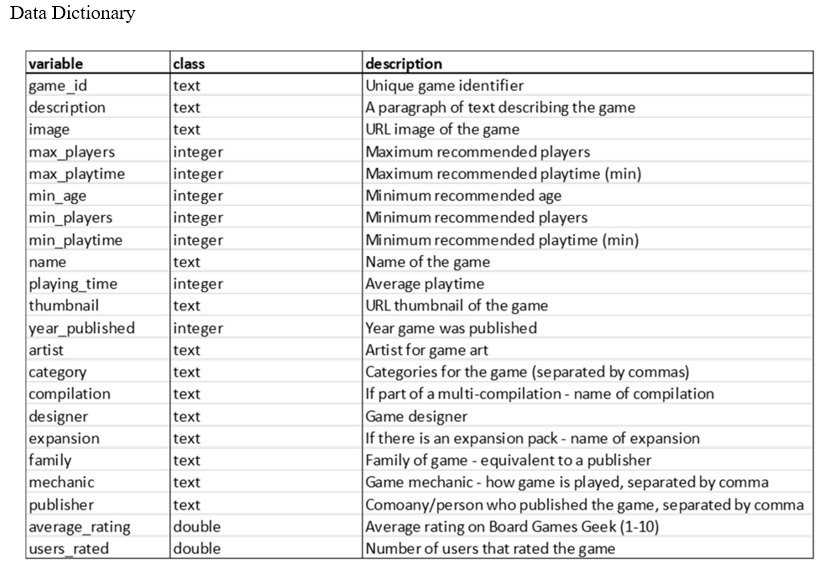

In [3]:
# Data Dictionary
from IPython.display import Image
Image(filename =r'Data_Dictionary.jpg')

In [4]:
df_games.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


In [5]:
df_games.shape

(10532, 22)

In [6]:
df_games.describe()

,game_id,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,users_rated
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000
mean,62059.203095,5.657330,91.341436,9.714964,2.070547,80.882738,91.341436,2003.070832,6.370856,870.081466
std,66223.716828,18.884403,659.754400,3.451226,0.664394,637.873893,659.754400,12.278296,0.850364,2880.214998
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,1.384210,50.000000
25%,5444.500000,4.000000,30.000000,8.000000,2.000000,25.000000,30.000000,1998.000000,5.829585,85.000000
50%,28822.500000,4.000000,45.000000,10.000000,2.000000,45.000000,45.000000,2007.000000,6.392965,176.000000
75%,126409.500000,6.000000,90.000000,12.000000,2.000000,90.000000,90.000000,2012.000000,6.942675,518.000000
max,216725.000000,999.000000,60000.000000,42.000000,9.000000,60000.000000,60000.000000,2016.000000,9.003920,67655.000000


In [7]:
df_games.describe(include=object)

,description,image,name,thumbnail,artist,category,compilation,designer,expansion,family,mechanic,publisher
count,10532,10531,10532,10531,7759,10438,410,10406,2752,7724,9582,10529
unique,10528,10527,10357,10527,4641,3860,336,4678,2634,3918,3209,5512
top,How could that have happened? Black Stories ar...,//cf.geekdo-images.com/images/pic2410035.png,Robin Hood,//cf.geekdo-images.com/images/pic2410035_t.png,Franz Vohwinkel,"Wargame,World War II","Traveller: The Classic Games, Games 1-6+",(Uncredited),"Règlement de l'An XXX,Regulations of the Year ...",Crowdfunding: Kickstarter,Hex-and-Counter,GMT Games
freq,3,2,5,2,166,449,8,558,7,391,523,180


In [8]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [9]:
num_nulls = df_games.isna().sum()
print(num_nulls)

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64


## Part 1: (Column Names are denoted by quotation marks)
  
•	What are the top 5 “average rated” games?  
•	Is there a correlation between the “users_rated” and the “max_playtime”?  
•	What is the distribution of game categories? (You may not use a barchart)
•	Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?  
•	What are the 5 most common “mechanics” in the dataset?  


### What are the top 5 “average rated” games?

Data Table with the top 5 games with “average rating” are:
                                              name  average_rating
0                     Small World Designer Edition         9.00392
1                           Kingdom Death: Monster         8.93184
2                           Terra Mystica: Big Box         8.84862
3                         Last Chance for Victory          8.84603
4  The Greatest Day: Sword, Juno, and Gold Beaches         8.83081


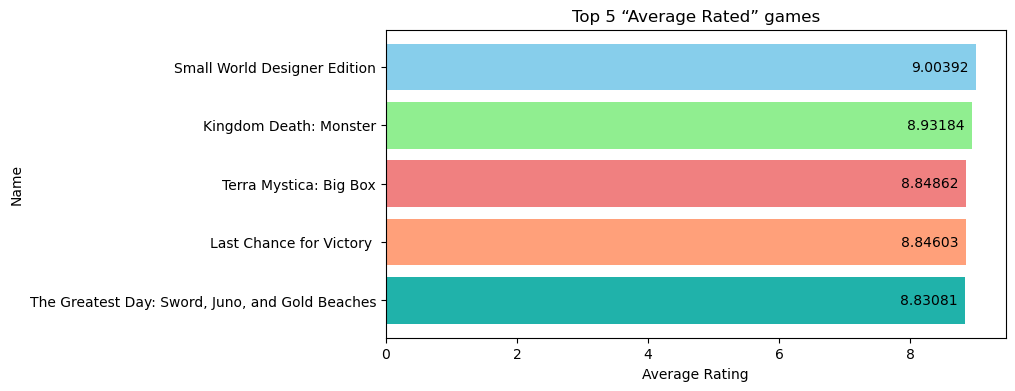

In [10]:
# Top 5 “average rated” games
df_games_top_5 = df_games[['name', 'average_rating']]

df_games_top_5 = df_games_top_5.sort_values(by='average_rating', ascending=False)

top_5 = df_games_top_5.head(5)

# Data Table
data = {'name': ['Small World Designer Edition', 'Kingdom Death: Monster', 'Terra Mystica: Big Box', 
                 'Last Chance for Victory ', 'The Greatest Day: Sword, Juno, and Gold Beaches'],
        'average_rating': [9.00392, 8.93184, 8.84862, 8.84603, 8.83081]}

top_5 = pd.DataFrame(data)

print("Data Table with the top 5 games with “average rating” are:")
print(top_5)

# Visualization
plt.figure(figsize=(8, 4))  
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen'] 

bars = plt.barh(top_5['name'], top_5['average_rating'], color=colors)  

for bar, rating in zip(bars, top_5['average_rating']):
    plt.text(bar.get_width() - 0.99, bar.get_y() + bar.get_height() / 2, f'{rating}', va='center')

plt.xlabel('Average Rating')
plt.ylabel('Name')
plt.title('Top 5 “Average Rated” games')
plt.gca().invert_yaxis()
plt.show()

### Is there a correlation between the “users_rated” and the “max_playtime”?

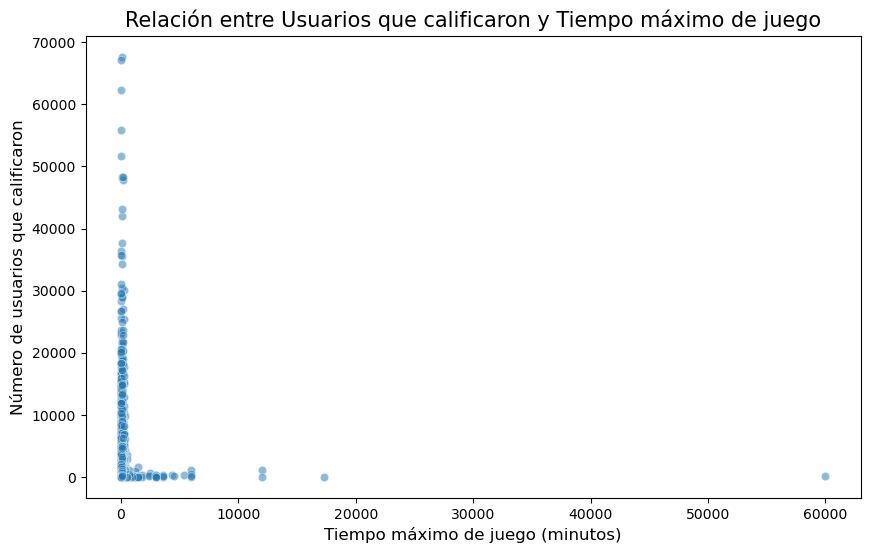

-0.00434164733377671

In [11]:
# Calculamos el coeficiente de correlación de Pearson entre 'users_rated' y 'max_playtime'
correlation = df_games['users_rated'].corr(df_games['max_playtime'])

# Visualizamos la correlación con un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_games['max_playtime'], y=df_games['users_rated'], alpha=0.5)
plt.title('Relación entre Usuarios que calificaron y Tiempo máximo de juego', fontsize=15)
plt.xlabel('Tiempo máximo de juego (minutos)', fontsize=12)
plt.ylabel('Número de usuarios que calificaron', fontsize=12)
plt.show()

correlation

### What is the distribution of game categories? (You may not use a barchart)

In [12]:
# Verificar la cantidad de valores nulos en la columna "category"
null_count = df_games["category"].isnull().sum()

null_count

94

In [13]:
# 1. Limpieza de datos: Reemplazar valores nulos por "Unknown"
df_games["category"].fillna("Unknown", inplace=True)

In [14]:
# 2. Tokenización: Separar las categorías
categories_tokenized = df_games["category"].str.split(',')

categories_tokenized.head()

0    [Economic, Negotiation, Political]
1                  [Card Game, Fantasy]
2         [Abstract Strategy, Medieval]
3                             [Ancient]
4                            [Economic]
Name: category, dtype: object

In [15]:
# Realizar la codificación one-hot para la columna "category"
category_onehot = df_games["category"].str.get_dummies(sep=',')

category_onehot.head()

,Abstract Strategy,Action / Dexterity,Adventure,Age of Reason,American Civil War,American Indian Wars,American Revolutionary War,American West,Ancient,Animals,...,Travel,Trivia,Unknown,Video Game Theme,Vietnam War,Wargame,Word Game,World War I,World War II,Zombies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# 4. Sumar las columnas para obtener la cantidad total de juegos en cada categoría
category_distribution_new = category_onehot.sum().sort_values(ascending=False)

category_distribution_new

Card Game                  2981
Wargame                    2034
Fantasy                    1218
Fighting                    900
Economic                    878
                           ... 
Pike and Shot                27
Game System                  22
American Indian Wars         15
Korean War                   14
Expansion for Base-game      11
Length: 84, dtype: int64

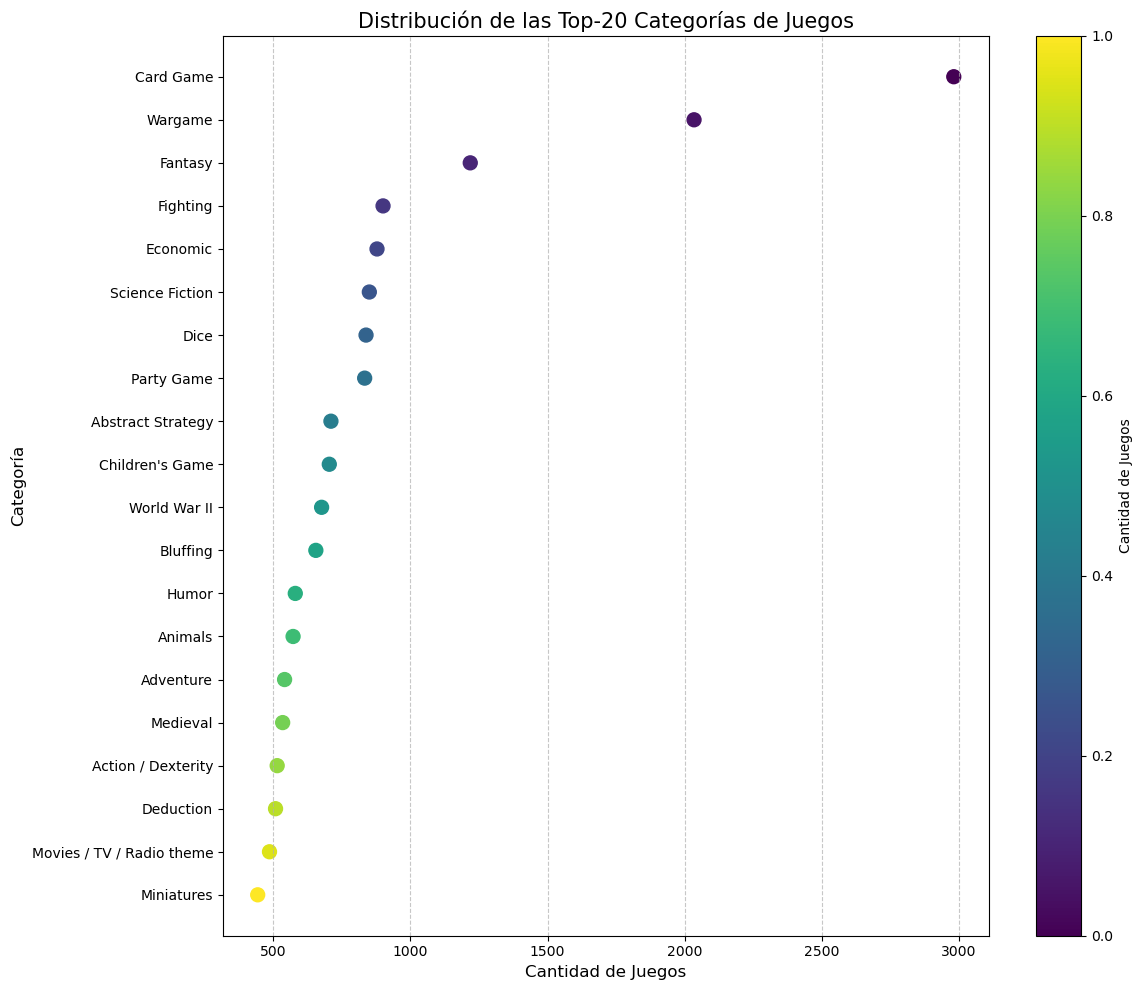

In [17]:
# Tomamos las top-20 categorías y sus respectivas cantidades
top_20_categories_new = category_distribution_new.head(20)
counts_new = top_20_categories_new.values
categories_new = top_20_categories_new.index

# Cambiar el color de los puntos en función de su valor, siendo el mayor más oscuro
colors_new = plt.cm.viridis(np.linspace(0, 1, len(counts_new)))

# Ordenar los puntos según su valor para que el color coincida con el orden
sorted_indices_new = counts_new.argsort()
sorted_counts_new = counts_new[sorted_indices_new]
sorted_categories_new = categories_new[sorted_indices_new]
sorted_colors_new = colors_new[sorted_indices_new]

# Crear el Dot Plot con colores
plt.figure(figsize=(12, 10))
plt.scatter(sorted_counts_new, sorted_categories_new, color=sorted_colors_new, s=100)
plt.title('Distribución de las Top-20 Categorías de Juegos', fontsize=15)
plt.xlabel('Cantidad de Juegos', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.colorbar(label='Cantidad de Juegos')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [18]:
# Dividimos el dataframe en dos grupos: juegos antiguos (1992 y anteriores) y juegos nuevos (después de 1992)
older_games = df_games[df_games['year_published'] <= 1992]
newer_games = df_games[df_games['year_published'] > 1992]

# Calculamos la mediana de la calificación promedio para cada grupo
median_rating_older = older_games['average_rating'].median()
median_rating_newer = newer_games['average_rating'].median()

median_rating_older, median_rating_newer

(6.08812, 6.462915)

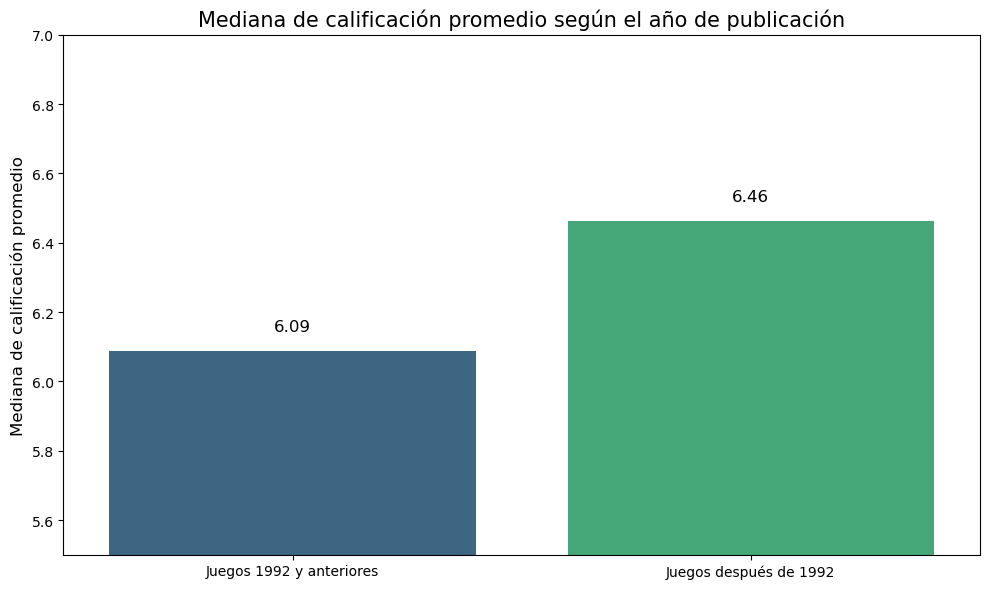

In [19]:
# Visualización de las medianas de calificación promedio para juegos antiguos y nuevos
labels = ['Juegos 1992 y anteriores', 'Juegos después de 1992']
medians = [median_rating_older, median_rating_newer]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=medians, palette='viridis')
plt.title('Mediana de calificación promedio según el año de publicación', fontsize=15)
plt.ylabel('Mediana de calificación promedio', fontsize=12)
plt.ylim(5.5, 7)

# Mostrar las medianas exactas en las barras
for i, v in enumerate(medians):
    plt.text(i, v + 0.05, "{:.2f}".format(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### What are the 5 most common “mechanics” in the dataset?

In [20]:
# Tokenización: Separamos las mecánicas, ya que un juego puede tener múltiples mecánicas (separadas por comas)
mechanics_tokenized = df_games['mechanic'].str.split(',', expand=True).stack().reset_index(drop=True)

# Contamos la frecuencia de cada mecánica
mechanics_counts = mechanics_tokenized.value_counts()

# Tomamos las 5 mecánicas más comunes
top_5_mechanics = mechanics_counts.head(5)
top_5_mechanics

Dice Rolling              2438
Hand Management           2176
Set Collection            1347
Hex-and-Counter           1244
Variable Player Powers    1223
dtype: int64

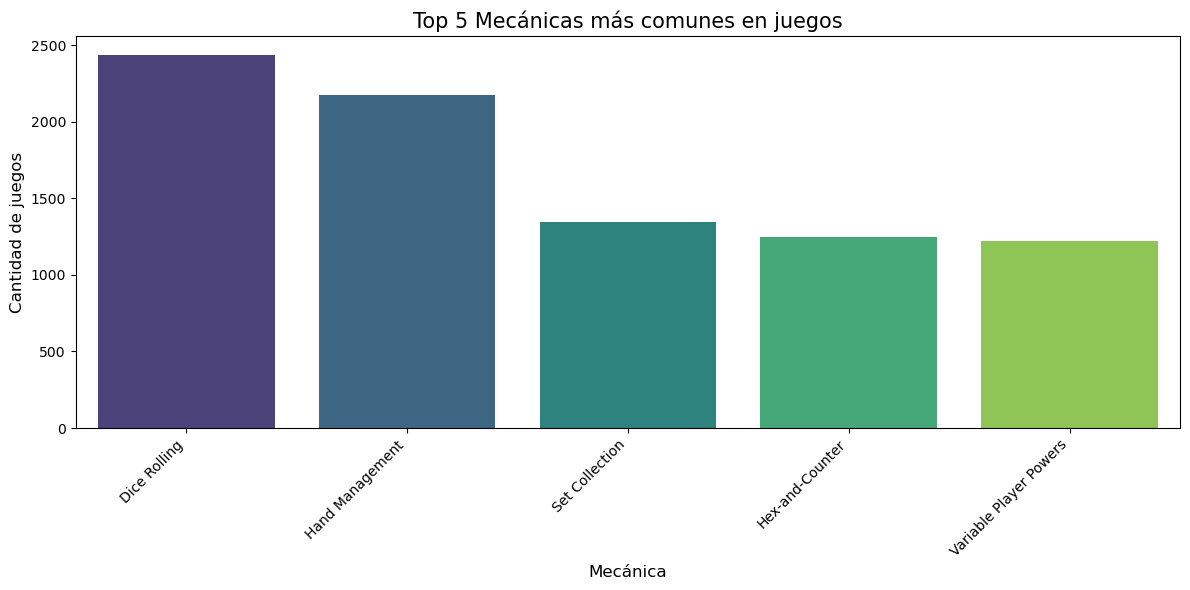

In [21]:
# Visualización de las 5 mecánicas más comunes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_mechanics.index, y=top_5_mechanics.values, palette='viridis')
plt.title('Top 5 Mecánicas más comunes en juegos', fontsize=15)
plt.xlabel('Mecánica', fontsize=12)
plt.ylabel('Cantidad de juegos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Part 2

### You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario.  

"¿Los juegos que tienen una duración de juego promedio (playing_time) más larga tienden a tener una calificación promedio (average_rating) más alta?"

Los juegos con una duración de juego más larga a menudo se perciben como más estratégicos o inmersivos, lo que podría influir en las percepciones de calidad y, por lo tanto, en las calificaciones. Si esta hipótesis es cierta, la empresa podría considerar promocionar más juegos de duración más larga durante la temporada de invierno, cuando las personas pueden estar más dispuestas a dedicar tiempo a juegos de mesa más largos y envolventes.

Para responder a esta pregunta, realizaremos un análisis exploratorio visualizando la relación entre "playing_time" y "average_rating". También calcularemos el coeficiente de correlación para cuantificar la relación entre estas dos variables.

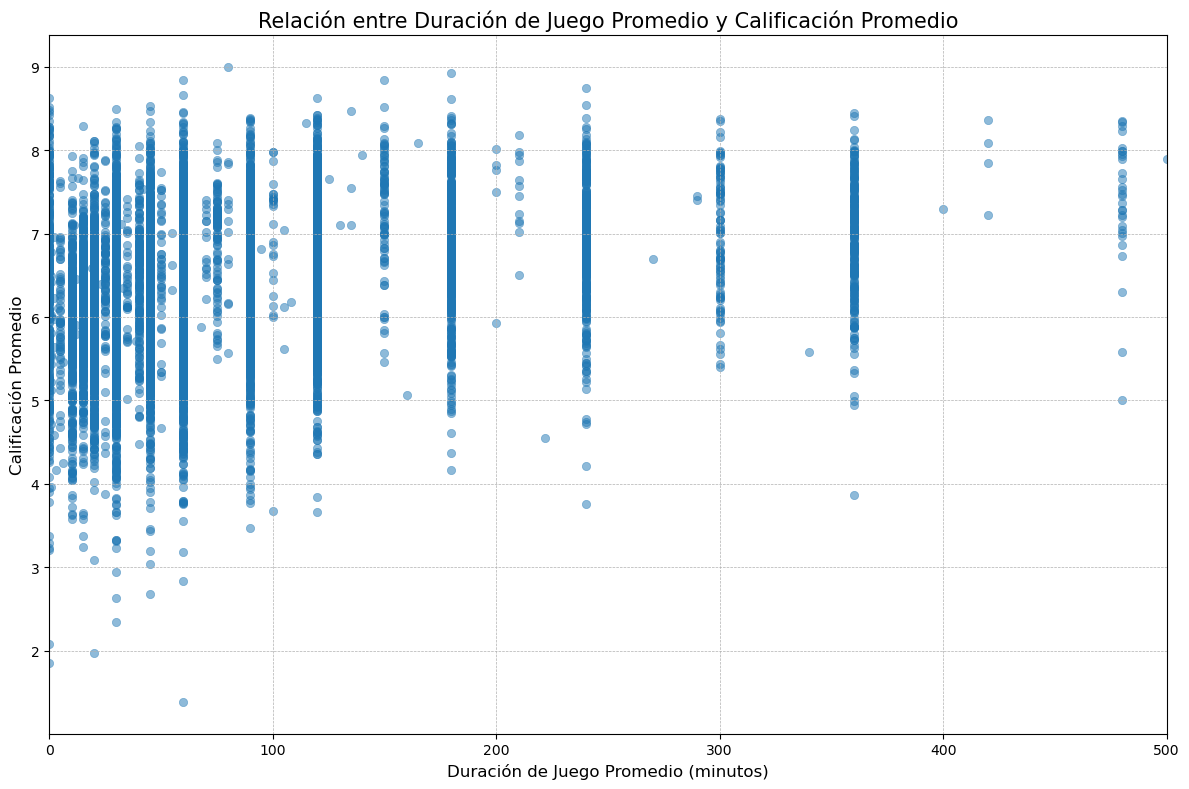

0.056439379682859996

In [26]:
# Visualización de la relación entre playing_time y average_rating
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_games['playing_time'], y=df_games['average_rating'], alpha=0.5, edgecolor=None)
plt.title('Relación entre Duración de Juego Promedio y Calificación Promedio', fontsize=15)
plt.xlabel('Duración de Juego Promedio (minutos)', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.xlim(0, 500)  # Limitamos el eje x para visualizar mejor la mayoría de los puntos
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Calcular el coeficiente de correlación entre playing_time y average_rating
correlation_coefficient_df_games = df_games['playing_time'].corr(df_games['average_rating'])
correlation_coefficient_df_games

La visualización muestra la relación entre la "Duración de Juego Promedio" y la "Calificación Promedio". Como puedes ver, hay una variedad de puntos dispersos, pero no parece haber una tendencia clara que indique que juegos con una mayor duración tienen necesariamente una calificación más alta. La mayoría de los juegos tienen una duración de menos de 500 minutos.

El coeficiente de correlación entre "playing_time" y "average_rating" es aproximadamente 
0.0564. Este valor es cercano a 0, lo que indica una correlación débil entre estas dos variables.

Conclusión:
La duración del juego y la calificación promedio tienen una correlación débil, lo que sugiere que no hay una relación fuerte entre la duración del juego y su calificación promedio. Por lo tanto, la duración del juego por sí sola no sería un buen indicador para predecir la popularidad o la calidad percibida de un juego.

"¿Existe una relación entre la edad mínima recomendada ("min_age") de un juego y su calificación promedio ("average_rating")? En otras palabras, ¿los juegos destinados a un público más maduro tienden a tener calificaciones más altas?"

Justificación:
La edad recomendada de un juego puede estar relacionada con la complejidad, el tema o el contenido del juego. Los juegos destinados a audiencias más maduras podrían ser percibidos como más estratégicos, desafiantes o inmersivos, lo que podría influir en las calificaciones. Si esta hipótesis es cierta, la empresa podría considerar promocionar más juegos destinados a audiencias maduras durante la temporada de invierno, cuando las personas podrían estar buscando juegos más sofisticados para jugar en interiores.

Para responder a esta pregunta, realizaremos un análisis exploratorio visualizando la relación entre "min_age" y "average_rating". También calcularemos el coeficiente de correlación para cuantificar la relación entre estas dos variables.

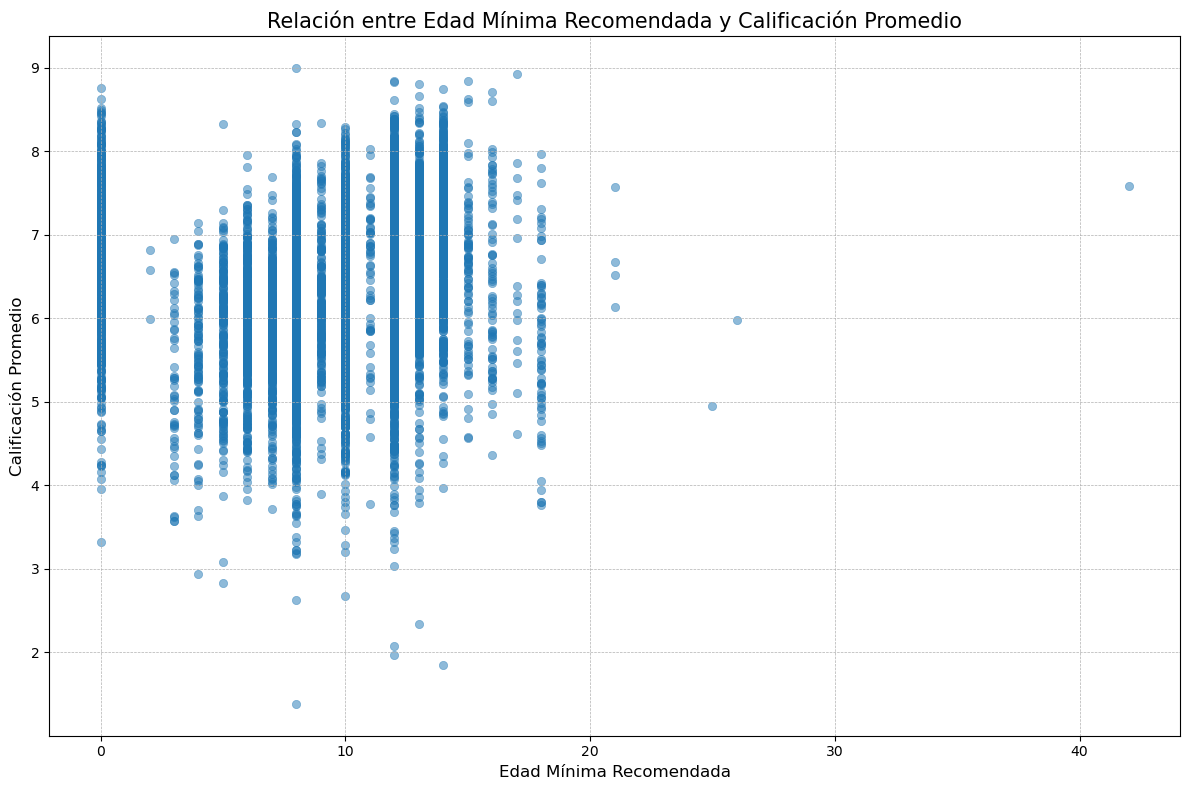

0.16777188771752852

In [27]:
# Visualización de la relación entre min_age y average_rating
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_games['min_age'], y=df_games['average_rating'], alpha=0.5, edgecolor=None)
plt.title('Relación entre Edad Mínima Recomendada y Calificación Promedio', fontsize=15)
plt.xlabel('Edad Mínima Recomendada', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Calcular el coeficiente de correlación entre min_age y average_rating
correlation_coefficient_age_rating = df_games['min_age'].corr(df_games['average_rating'])
correlation_coefficient_age_rating

La visualización muestra la relación entre la "Edad Mínima Recomendada" y la "Calificación Promedio". Aunque los puntos están dispersos, parece haber una ligera tendencia ascendente, lo que indica que los juegos destinados a audiencias más maduras podrían tener calificaciones promedio ligeramente más altas.

El coeficiente de correlación entre "min_age" y "average_rating" es aproximadamente 
0.1678
0.1678. Aunque este valor no es extremadamente alto, indica una correlación positiva débil entre estas dos variables.

Racionalización del diseño de visualización:

Se eligió un gráfico de dispersión porque es adecuado para visualizar y evaluar la relación entre dos variables continuas.
Se utilizó un color suave y una baja opacidad para los puntos para mejorar la legibilidad en áreas donde los puntos están densamente agrupados.
Se agregaron líneas de cuadrícula para facilitar la lectura de valores en el gráfico.

Conclusión:

Hay una correlación positiva débil entre la edad mínima recomendada de un juego y su calificación promedio. Esto sugiere que los juegos destinados a audiencias más maduras pueden ser percibidos ligeramente más positivamente, aunque la relación no es muy fuerte. La empresa podría considerar esta información al seleccionar y promocionar juegos para la próxima temporada de invierno, especialmente si están buscando atraer a un público más maduro.

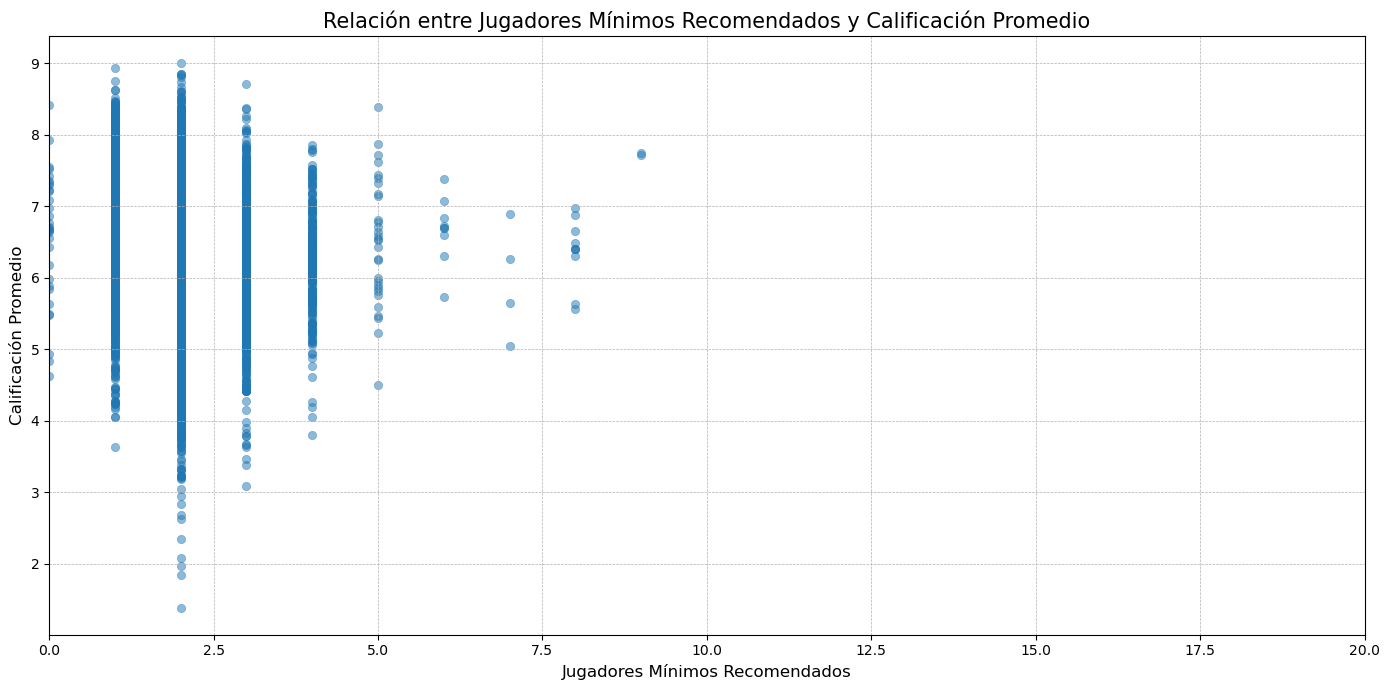

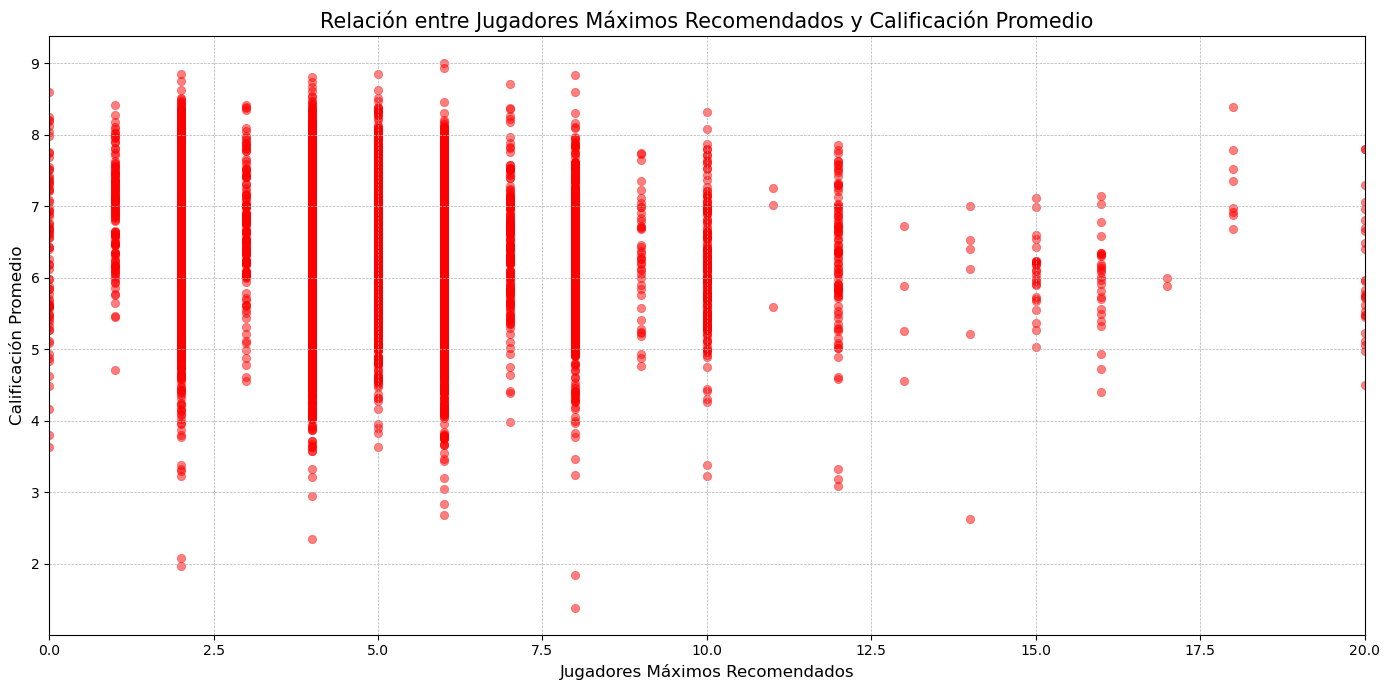

(-0.11787633906962296, -0.026563924860796548)

In [25]:
# Visualización de la relación entre min_players y average_rating
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_games, x='min_players', y='average_rating', alpha=0.5, edgecolor=None)
plt.title('Relación entre Jugadores Mínimos Recomendados y Calificación Promedio', fontsize=15)
plt.xlabel('Jugadores Mínimos Recomendados', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.xlim(0, 20)  # Limitamos el eje x para visualizar mejor la mayoría de los puntos
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Visualización de la relación entre max_players y average_rating
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_games, x='max_players', y='average_rating', alpha=0.5, edgecolor=None, color='red')
plt.title('Relación entre Jugadores Máximos Recomendados y Calificación Promedio', fontsize=15)
plt.xlabel('Jugadores Máximos Recomendados', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.xlim(0, 20)  # Limitamos el eje x para visualizar mejor la mayoría de los puntos
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Calcular los coeficientes de correlación
correlation_min_players = df_games['min_players'].corr(df_games['average_rating'])
correlation_max_players = df_games['max_players'].corr(df_games['average_rating'])

correlation_min_players, correlation_max_players

## Part3:
  
You must explain, in detail,    
•	why you chose a specific method to engineer the data and how you achieved this in python (Part 1/Part 2)  
•	why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)  
•	what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)  
•	what your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)  
